## Bank Marketing data - Machine learning approach

In this project I tried to use machine learning methods to create a predictive model that could predict reliably if a customer will make a long-term deposit or not. The data was obtained from [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The idea in this project is also to compare machine learning methods to traditional statistical methods, in this case Logistic regression.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Downloads/bank-additional/bank-additional-full.csv", sep=";")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
(df == 'unknown').sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [8]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [9]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [10]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(df['y'], label='lkm')
ax.set_ylabel('lkm')
#plt.savefig('countplot.png', dpi=200, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
round(df.y.value_counts(normalize=True), 2)

no     0.89
yes    0.11
Name: y, dtype: float64

In [7]:
df['y'] = df['y'].map({'no':0, 'yes':1})

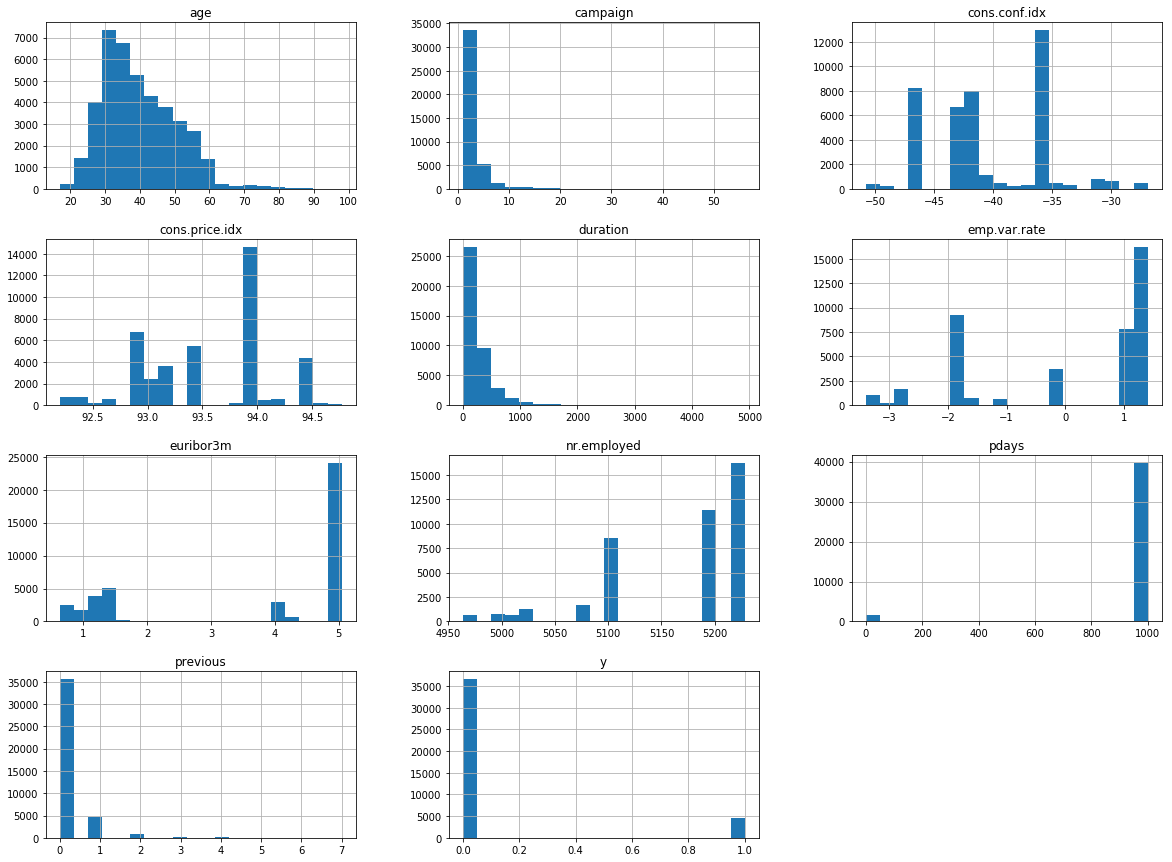

In [15]:
df.hist(bins=20, figsize=(20,15))
plt.show()

In [16]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

Most of the customers have not been contacted before, so I decided to change the variable pdays to a binary variable which indicates if the customer has been contacted previously or not.

In [8]:
import numpy as np
bins = [0, 998, np.inf]
names = ['previous_campaign', 'no_previous_campaign']

df['pdays'] = pd.cut(df['pdays'], bins, labels=names)

Exactly 1500 customers have been contacted previously.

In [9]:
df.pdays.value_counts()

no_previous_campaign    39673
previous_campaign        1500
Name: pdays, dtype: int64

/home/pekka/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


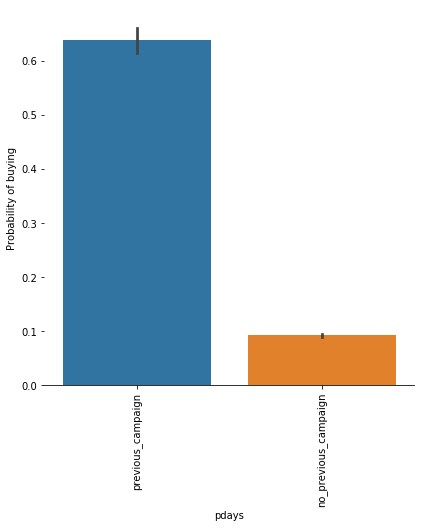

In [11]:
g = sns.factorplot(y='y', x='pdays', data=df, kind='bar', height=6)
g.despine(left=True)
g = g.set_ylabels("Probability of buying")
g.set_xticklabels(rotation=90)
plt.show()

Categorical attributes/features need to be converted to numerical values. Some of the categorical variables have some kind of order, so I converted them to ordinal variables. Rest of the categorical variables were converted to dummy variables. The numerical variables were normalized/scaled to have values between 0 and 1.

In [12]:
num_attribs = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
cat_attribs = ['marital', 'month', 'day_of_week', 'pdays']
ord_attribs = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']


In [13]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_ordinal = df[ord_attribs]
df_ordinal_encoded = ordinal_encoder.fit_transform(df_ordinal.astype('str'))

In [14]:
df_ordinal_encoded.shape

(41188, 7)

In [15]:
ordinal_df = pd.DataFrame(df_ordinal_encoded, columns=ord_attribs)

In [16]:
ordinal_df.head()

,job,education,default,housing,loan,contact,poutcome
0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
1,7.0,3.0,1.0,0.0,0.0,1.0,1.0
2,7.0,3.0,0.0,2.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,7.0,3.0,0.0,0.0,2.0,1.0,1.0


In [17]:
ordinal_encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['cellular', 'telephone'], dtype=object),
 array(['failure', 'nonexistent', 'success'], dtype=object)]

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

num_pipeline = Pipeline([
        #('imputer', Imputer(strategy="median")),
        ('minmax_scaler', MinMaxScaler()),
        #('std_scaler', StandardScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df[num_attribs])

In [19]:
df_num_tr

array([[0.48148148, 0.        , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.        , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.        , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.01818182, 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.03636364, 0.14285714, ..., 0.        , 0.08932215,
        0.        ]])

In [20]:
numer_df = pd.DataFrame(df_num_tr, columns=num_attribs)

In [21]:
full_df = pd.concat([numer_df.reset_index(drop=True), ordinal_df.reset_index(drop=True)], axis=1)

In [22]:
full_df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,education,default,housing,loan,contact,poutcome
0,0.481481,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,3.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.493827,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,7.0,3.0,1.0,0.0,0.0,1.0,1.0
2,0.246914,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,7.0,3.0,0.0,2.0,0.0,1.0,1.0
3,0.283951,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.481481,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,7.0,3.0,0.0,0.0,2.0,1.0,1.0


In [23]:
for col in cat_attribs:
    dummies = pd.get_dummies(df[col])
    dummies.drop(dummies.columns[len(dummies.columns)-1], axis=1, inplace=True)
    full_df = pd.concat([full_df.reset_index(drop=True), dummies.reset_index(drop=True)], axis=1)

In [24]:
full_df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,education,...,jun,mar,may,nov,oct,fri,mon,thu,tue,previous_campaign
0,0.481481,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,3.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1,0.493827,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,7.0,3.0,...,0,0,1,0,0,0,1,0,0,0
2,0.246914,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,7.0,3.0,...,0,0,1,0,0,0,1,0,0,0
3,0.283951,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,1.0,...,0,0,1,0,0,0,1,0,0,0
4,0.481481,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,7.0,3.0,...,0,0,1,0,0,0,1,0,0,0


In [25]:
full_df.shape

(41188, 32)

In [26]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
age                  41188 non-null float64
campaign             41188 non-null float64
previous             41188 non-null float64
emp.var.rate         41188 non-null float64
cons.price.idx       41188 non-null float64
cons.conf.idx        41188 non-null float64
euribor3m            41188 non-null float64
nr.employed          41188 non-null float64
job                  41188 non-null float64
education            41188 non-null float64
default              41188 non-null float64
housing              41188 non-null float64
loan                 41188 non-null float64
contact              41188 non-null float64
poutcome             41188 non-null float64
divorced             41188 non-null uint8
married              41188 non-null uint8
single               41188 non-null uint8
apr                  41188 non-null uint8
aug                  41188 non-null uint8
dec                  

Some of the categorical variables contained some missing values. I decided to just keep the rows with missing values and treat the missing values as a category of a given variable. 

After the data was ready, the data was split to training (50%), validation(25%) and testing (25%) parts. 

In [85]:
# Splitting the data into train, validation and test sets. HUOM!! Tähän muutettu jako: 15% 15% 70%. Oikeat tulokset saavutettu 25% 25% 50% jaolla.

from sklearn.model_selection import train_test_split

X = full_df
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3333, random_state=42) 

In [86]:
X_train.shape


(20595, 32)

In [87]:
print("Train set size: {}".format(round(X_train.shape[0]/full_df.shape[0], 2)))
print("Validation set size: {}".format(round(X_val.shape[0]/full_df.shape[0], 2)))
print("Test set size: {}".format(X_test.shape[0]/full_df.shape[0]))

Train set size: 0.5
Validation set size: 0.25
Test set size: 0.25


In [81]:
import statsmodels.api as sm

#Adding constant
X_train_copy = X_train.copy()
X_train_copy['intercept'] = 1

#Fitting the model
model = sm.Logit(list(y_train) , X_train_copy, method='ncg')
results = model.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.274847
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.213     
Dependent Variable: y                AIC:              11391.8777
Date:               2019-05-24 19:40 BIC:              11653.6747
No. Observations:   20604            Log-Likelihood:   -5662.9   
Df Model:           32               LL-Null:          -7199.1   
Df Residuals:       20571            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age                0.2455   0.1960  1.2527 0.2103 -0.1386  0.6296
campaign          -2.8829   0.7514 -3.8366 0.0001 -4.3557 -1.4101


In [82]:
#with open('summary.txt', 'w') as fh:
#    fh.write(results.summary2().as_text())

In [83]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression(C=1e9, solver='newton-cg')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)
print("Training set Accuracy: {}".format(log_reg.score(X_train,y_train)))
print("Validation set Accuracy: {}".format(accuracy_score(y_val, y_pred)))
print("Validation set AUC: {}".format(roc_auc_score(y_val, log_reg.predict_proba(X_val)[:,1])))

Training set Accuracy: 0.9006503591535624
Validation set Accuracy: 0.8989987362690774
Validation set AUC: 0.8052880482306453


In [42]:
log_reg.coef_

array([[ 2.61935193e-01, -2.91229841e+00, -4.42890777e-01,
        -7.44644323e+00,  5.32014047e+00,  6.04300926e-01,
         1.39210472e+00,  1.49346695e+00,  5.27973125e-03,
         3.00489038e-02, -2.58748934e-01, -2.17205597e-02,
         1.96331512e-02, -8.32061372e-01,  4.63573289e-01,
         3.52660492e-01,  3.23219016e-01,  4.00703676e-01,
        -2.46926986e-01,  1.60780229e-01,  2.40712759e-02,
        -1.64980346e-01, -8.22866373e-01,  1.20794925e+00,
        -6.57637283e-01, -7.64681439e-01, -1.53309152e-01,
        -1.13033774e-01, -3.38664767e-01, -1.26133434e-03,
        -4.26502967e-02,  9.49909606e-01]])

In [43]:
log_reg.intercept_

array([-2.35860879])

I decided to write this simple function which can be used to obtain accuracy and AUC scores for multiple models easily.

In [44]:
def get_results(classifiers, names, X=X_train, y=y_train, X_val=X_val, y_val=y_val, val_scores=True):
    
    results_dict = {}
    i=0
    
    for clf in classifiers:
        clf.fit(X, y)
        y_pred = clf.predict(X_val)
        
        train_set_acc = round(clf.score(X, y), 4)
        train_set_auc = round(roc_auc_score(y, clf.predict_proba(X)[:,1]), 4)
        val_set_acc = round(accuracy_score(y_val, y_pred), 4)
        val_set_auc = round(roc_auc_score(y_val, clf.predict_proba(X_val)[:,1]), 4)
        
        results_dict[names[i]] = [train_set_acc, train_set_auc, val_set_acc, val_set_auc]
        i += 1
        
    results_df = pd.DataFrame.from_dict(results_dict, orient='index')
    if val_scores:
        results_df.columns = ['train acc','train auc', 'val acc', 'val auc']
    else:
        results_df.columns = ['train acc','train auc', 'test acc', 'test auc']
    
    
    return results_df
                                       

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [52]:
classifiers = [LogisticRegression(C=1e9, solver='newton-cg'), KNeighborsClassifier(), DecisionTreeClassifier(random_state=42), 
               RandomForestClassifier(random_state=42),
               SVC(kernel='linear', probability=True), SVC(kernel='poly', degree=2, probability=True, gamma='auto'),
               SVC(kernel='poly', degree=3, probability=True, gamma='auto'),
              GradientBoostingClassifier(random_state=42)]
clf_names = ['Logit', 'KNN', 'Decision tree', 'Random Forest',
             'SVC linear', 'SVC poly2', 'SVC poly3',
             'GBM', ]

In [53]:
results1 = get_results(classifiers, clf_names)

/home/pekka/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


I decided to fit the data to using several machine learning methods with default settings and then try to tune the hyperparameters of few most promising models. As the data is very imbalanced I also decided to try simple undersampling and simple oversampling methods. Under-/oversampling can sometimes improve the models accuracy but in this case there was no significant improvement so in the end I decided to use the original data.


In [54]:
results1

,train acc,train auc,val acc,val auc
Logit,0.9008,0.7936,0.8987,0.8042
KNN,0.9092,0.9212,0.8877,0.7053
Decision tree,0.9965,0.9999,0.8365,0.6297
Random Forest,0.9835,0.9987,0.8865,0.7611
SVC linear,0.8981,0.6777,0.8968,0.6809
SVC poly2,0.8985,0.7014,0.8966,0.7090
SVC poly3,0.8984,0.7442,0.8949,0.7138
GBM,0.9078,0.8104,0.9013,0.8084


In [55]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_undersampled).items()))

[(0, 2303), (1, 2303)]


In [56]:
results_rus = get_results(classifiers, clf_names, X_undersampled, y_undersampled)

In [57]:
results_rus

,train acc,train auc,val acc,val auc
Logit,0.7356,0.7898,0.8236,0.8025
KNN,0.7805,0.8598,0.7036,0.7113
Decision tree,0.9972,1.0000,0.6327,0.6439
Random Forest,0.9755,0.9985,0.7744,0.7647
SVC linear,0.7306,0.7696,0.8355,0.7910
SVC poly2,0.7204,0.7801,0.7425,0.7858
SVC poly3,0.7334,0.7942,0.8320,0.7842
GBM,0.7549,0.8325,0.8347,0.8076


In [58]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

print(sorted(Counter(y_oversampled).items()))

[(0, 18393), (1, 18393)]


In [553]:
results_ros = get_results(classifiers, clf_names, X_oversampled, y_oversampled)

,train acc,train auc,val acc,val auc
Logit,0.740315,0.795342,0.825272,0.807188
KNN,0.923419,0.996835,0.763889,0.692392
Decision tree,0.997814,0.999952,0.844406,0.619248
Random Forest,0.997049,0.999930,0.882382,0.762114
SVC linear,0.733894,0.772616,0.836053,0.788778
SVC poly2,0.739359,0.795259,0.825369,0.795660
SVC poly3,0.747118,0.810949,0.838190,0.791083
GBM,0.756243,0.829757,0.832556,0.812776


In [59]:
#with pd.ExcelWriter('results.xlsx') as writer:
    #results1.to_excel(writer, sheet_name='Original data')
    #results_rus.to_excel(writer, sheet_name='Undersampled data')
    #results_ros.to_excel(writer, sheet_name='Oversampled data')

Because Gradient boosting seemed the most promising method I decided to tune the hyperparameters of the gradient boosting model. I tried a few values for the learning rate and used early stopping to find the optimal number of trees (563) for the model. The optimal number of trees is depicted in an image below. I also tuned the hyperparameters of the decision tree model. The hyperparameter tuning improved the decision tree model greatly but it still didn't quite match the performance of the gradient boosting model.

Optimaalinen kutistustermi: 0.1


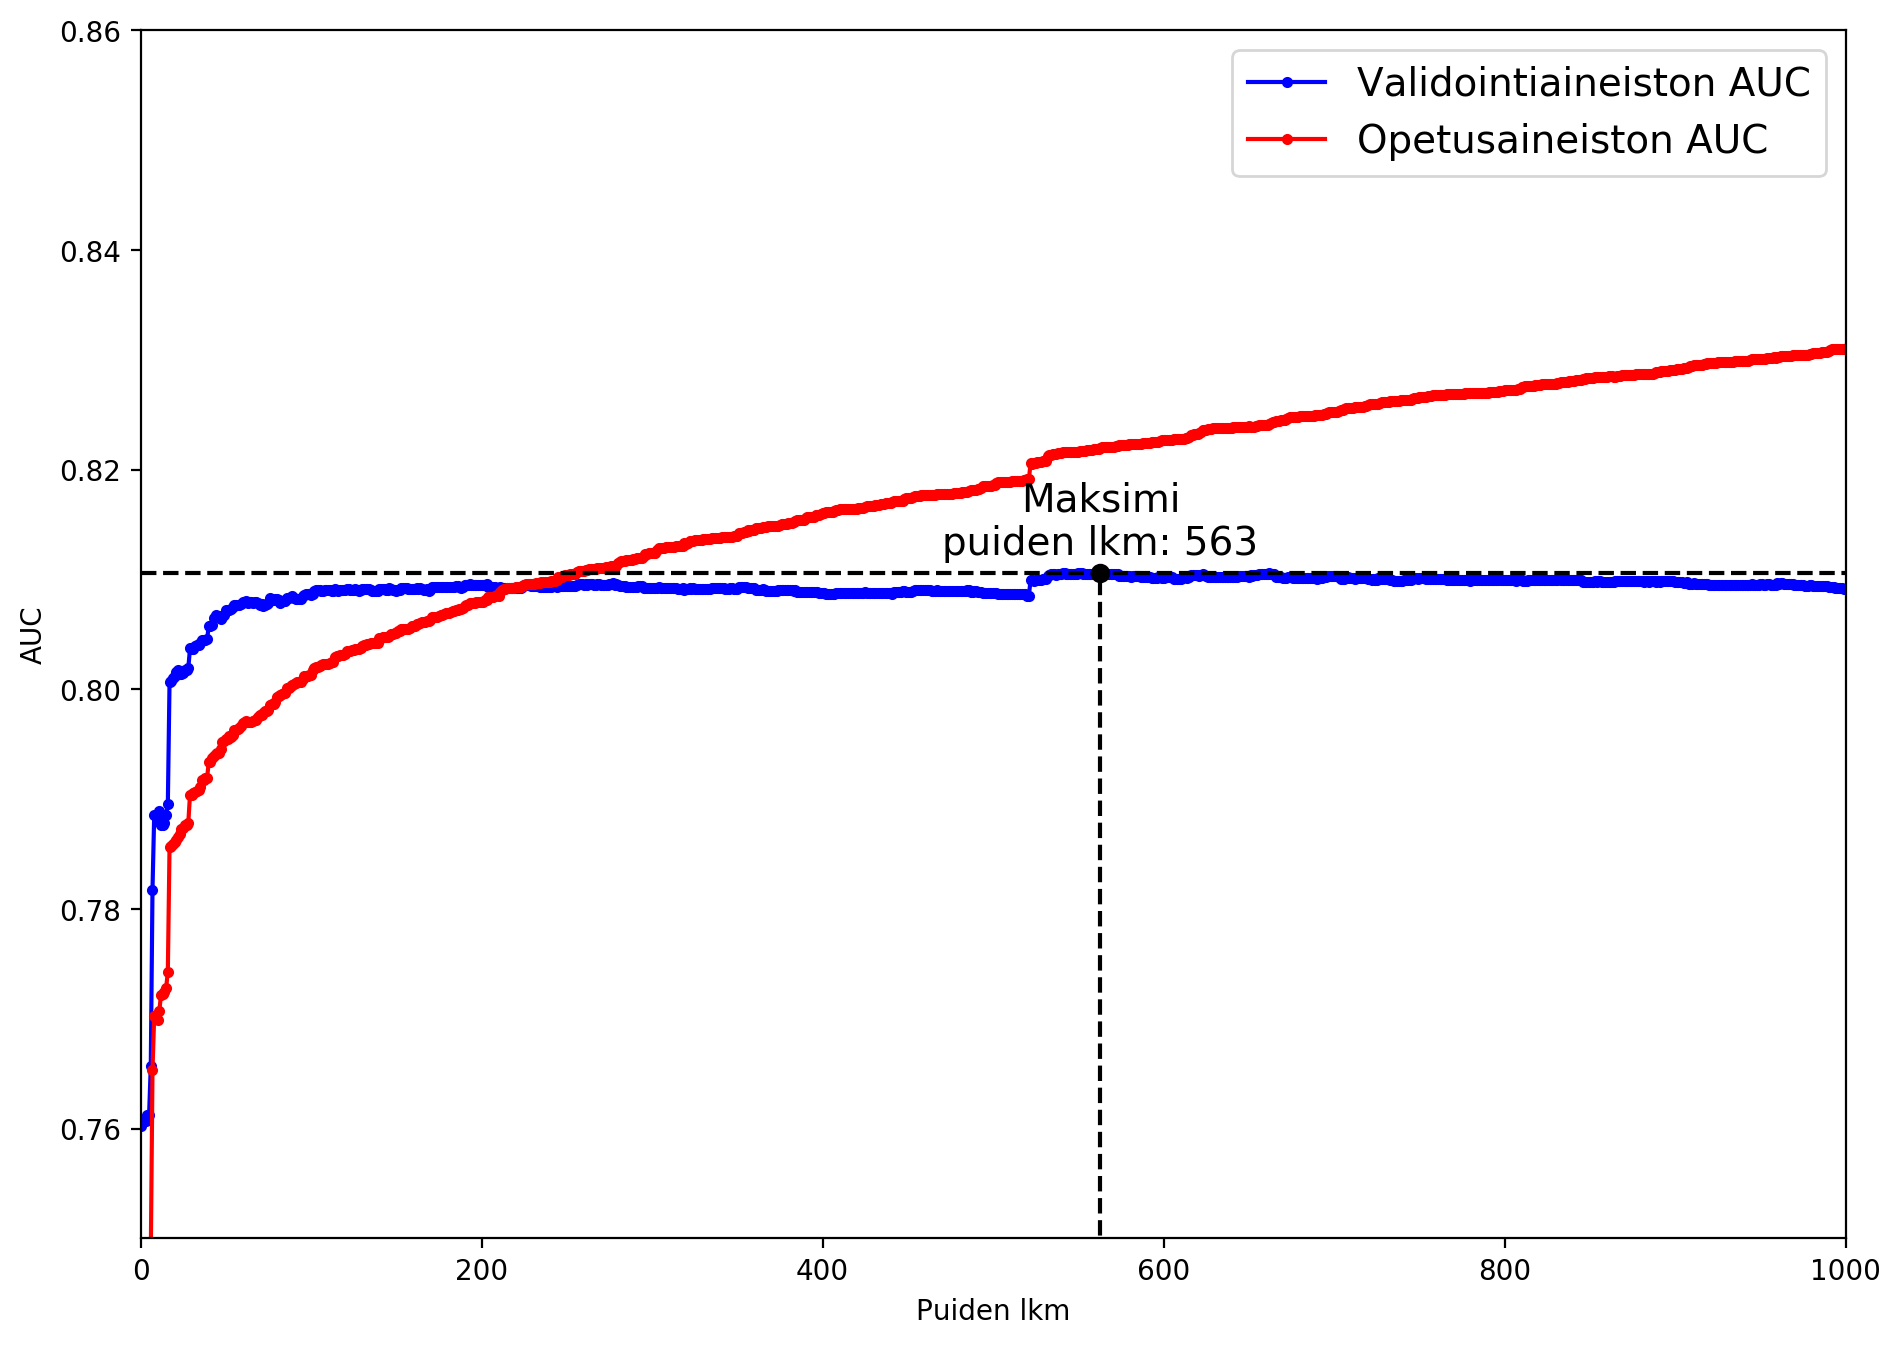

In [88]:
rates = [0.05, 0.1, 0.15]
val_aucs = []
train_aucs = []
all_aucs = []
n_estimators1 = []
aucs1 = []


for lrate in rates:
    gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=1500, random_state=42, learning_rate=lrate)
    gbrt.fit(X_train , y_train)

    aucs = [roc_auc_score(y_val, y_pred[:,1])
              for y_pred in gbrt.staged_predict_proba(X_val)]
    
    train_set_aucs = [roc_auc_score(y_train, y_pred[:,1])
          for y_pred in gbrt.staged_predict_proba(X_train)]

    bst_n_estimators = np.argmax(aucs)
    max_auc = np.max(aucs)


    #print("Kutistustermi: {}".format(lrate))
    #print(round(max_auc), 4)
    #print(bst_n_estimators)
    #print("\n")
    aucs1.append(max_auc)
    n_estimators1.append(bst_n_estimators)
    
    val_aucs.append(aucs)
    train_aucs.append(train_set_aucs)
    
best_lrate = rates[np.argmax(aucs1)]
print("Optimaalinen kutistustermi: {}".format(best_lrate))
max_auc = aucs1[np.argmax(aucs1)]
bst_n_estimators = n_estimators1[np.argmax(aucs1)]

gbrt_best = GradientBoostingClassifier(max_depth=2,n_estimators=bst_n_estimators, random_state=42, learning_rate=best_lrate)


plt.figure(figsize=(11, 8), dpi=200)
plt.plot(val_aucs[np.argmax(aucs1)], "b.-", label="Validointiaineiston AUC")
plt.plot(train_aucs[np.argmax(aucs1)], "r.-", label="Opetusaineiston AUC")
plt.plot([bst_n_estimators, bst_n_estimators], [0, max_auc], "k--")
plt.plot([0, 1000], [max_auc, max_auc], "k--")
plt.plot(bst_n_estimators, max_auc, "ko")
plt.text(bst_n_estimators, max_auc*1.002, "Maksimi\npuiden lkm: "+str(bst_n_estimators), ha="center", fontsize=14)
plt.axis([0, 1000, 0.750, 0.86])
plt.xlabel("Puiden lkm")
plt.ylabel("AUC")
#plt.title("GT malli - kutistustermi {}".format(best_lrate), fontsize=14)
plt.legend(fontsize=14)

#plt.savefig('gbm_earlystopping.png', dpi=200, bbox_inches='tight')
plt.show()

In [89]:
gbrt_best.fit(X_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=563,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Text(0.5, 1.0, 'GT')

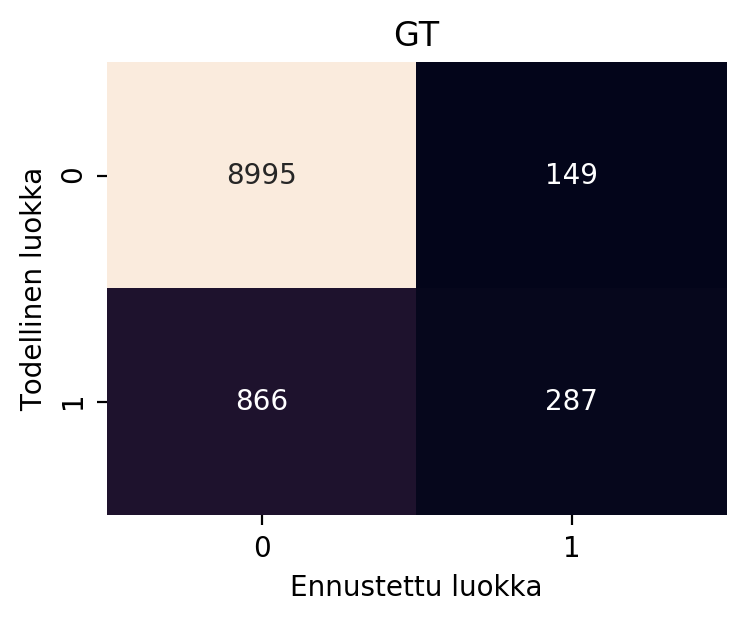

In [90]:
import seaborn as sns
y_pred = gbrt_best.predict(X_test)
cmat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cmat)
plt.figure(figsize = (4,3), dpi=200)
ax = plt.axes()
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
ax.set_xlabel("Ennustettu luokka")
ax.set_ylabel("Todellinen luokka")
ax.set_title("GT")
#plt.savefig('CM_gbm.png', dpi=200, bbox_inches='tight')

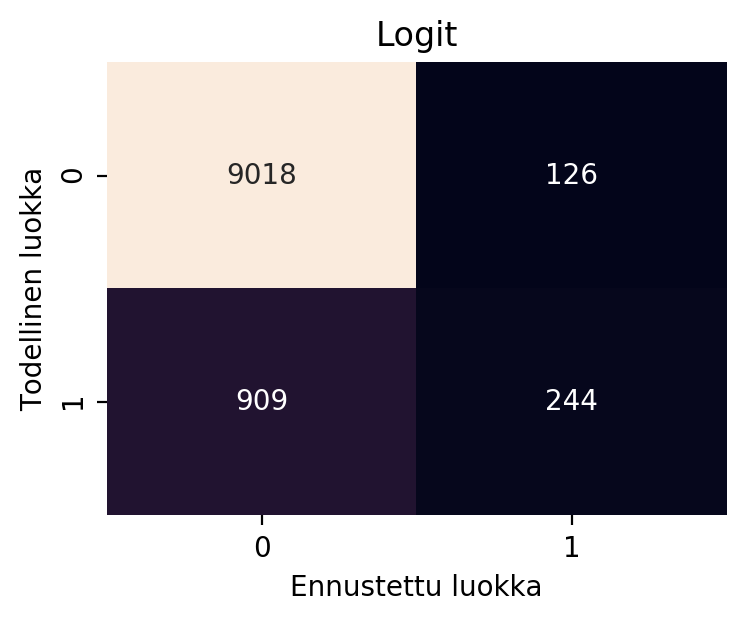

In [91]:
y_pred = log_reg.predict(X_test)
cmat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cmat)
plt.figure(figsize = (4,3), dpi=200)
ax = plt.axes()
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
ax.set_xlabel("Ennustettu luokka")
ax.set_ylabel("Todellinen luokka")
ax.set_title("Logit")
plt.savefig('CM_logit.png', dpi=200, bbox_inches='tight')

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[1,5,7,9], 'min_samples_leaf':[1,5,10,12,18,22,26,30]}


dt_clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_clf, param_grid=param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 5, 7, 9],
                         'min_samples_leaf': [1, 5, 10, 12, 18, 22, 26, 30]},
        

In [93]:
df_gridsearch = pd.DataFrame(grid_search.cv_results_)[['param_max_depth','param_min_samples_leaf','mean_test_score']]

In [94]:
max_scores = df_gridsearch.groupby(['param_max_depth','param_min_samples_leaf']).max().unstack()

Text(141.44444444444443, 0.5, 'Maksimisyvyys')

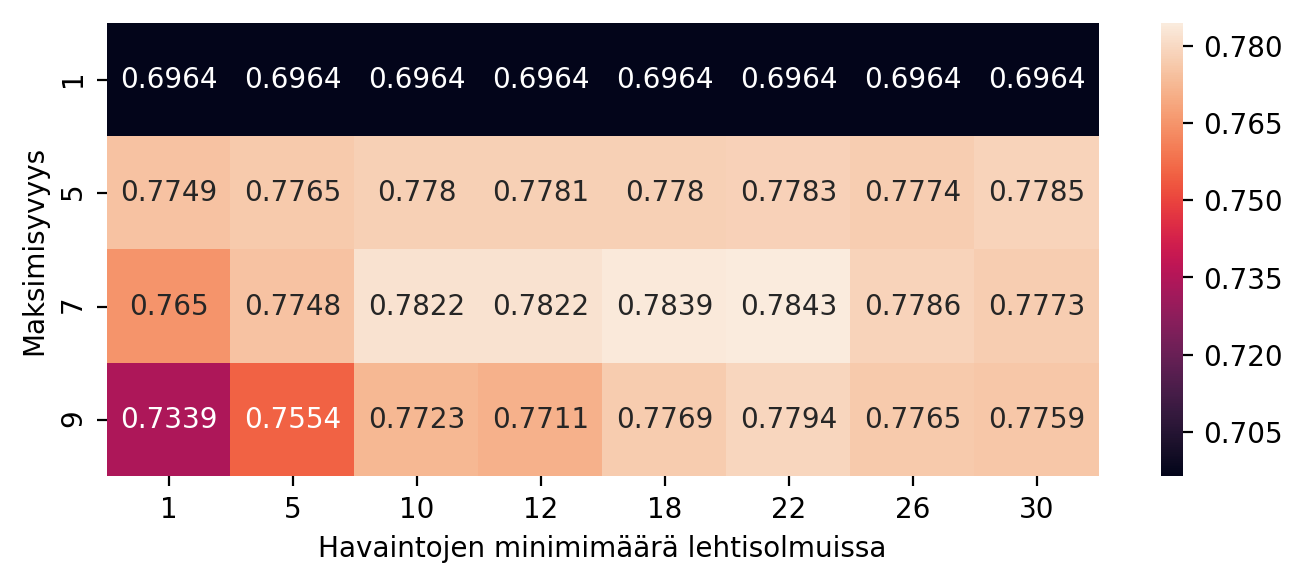

In [95]:
fmt = 'png'
plt.figure(figsize = (8,3), dpi=200)
ax = plt.axes()
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
ax.set_xlabel("Havaintojen minimimäärä lehtisolmuissa")
ax.set_ylabel("Maksimisyvyys")
#plt.savefig('DT_gridsearch.png', dpi=200, bbox_inches='tight')

In [96]:
dt_best = grid_search.best_estimator_
dt_best.fit(X_train, y_train)


print("Decision tree, test set accuracy: {}".format(accuracy_score(y_test, dt_best.predict(X_test))))
print("Decision tree, test set AUC: {}".format(roc_auc_score(y_test, dt_best.predict_proba(X_test)[:,1])))

Decision tree, test set accuracy: 0.8983198989997087
Decision tree, test set AUC: 0.7813600015631177


Text(0.5, 1.0, 'Päätöspuu')

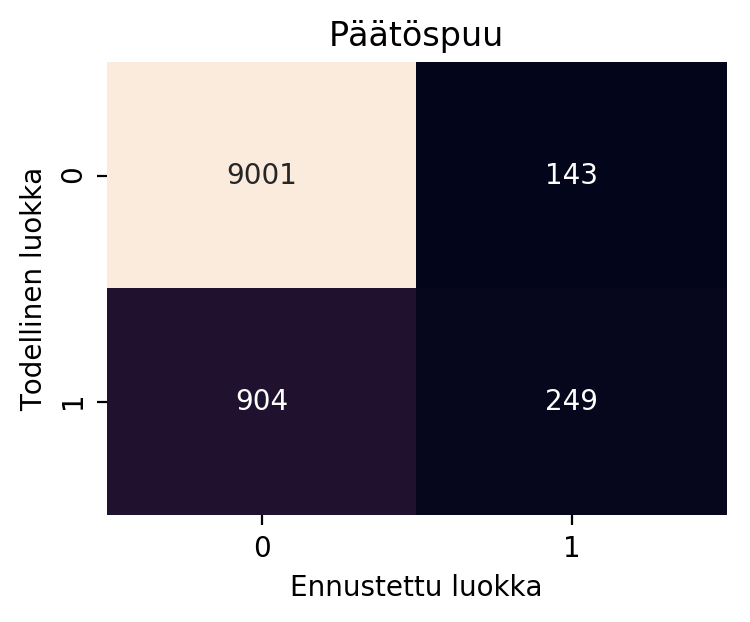

In [97]:
y_pred = dt_best.predict(X_test)
cmat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cmat)
plt.figure(figsize = (4,3), dpi=200)
ax = plt.axes()
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
ax.set_xlabel("Ennustettu luokka")
ax.set_ylabel("Todellinen luokka")
ax.set_title("Päätöspuu")
#plt.savefig('CM_päätöspuu.png', dpi=200, bbox_inches='tight')

In [98]:
final_results = get_results(classifiers=[log_reg, dt_best, gbrt_best], 
                            X_val=X_test, y_val=y_test, names=['logit','DT','GT'], val_scores=False)

#final_results.to_excel('final_results.xlsx')
final_results

,train acc,train auc,test acc,test auc
logit,0.9008,0.7936,0.8995,0.7807
DT,0.9057,0.8035,0.8987,0.7814
GT,0.9085,0.8220,0.9016,0.7904


In [71]:
from sklearn.tree import export_graphviz

export_graphviz(
            dt_best,
            out_file="bank_tree.dot",
            feature_names=list(X.columns),
            class_names=['0','1'],
            rounded=True,
            filled=True
)

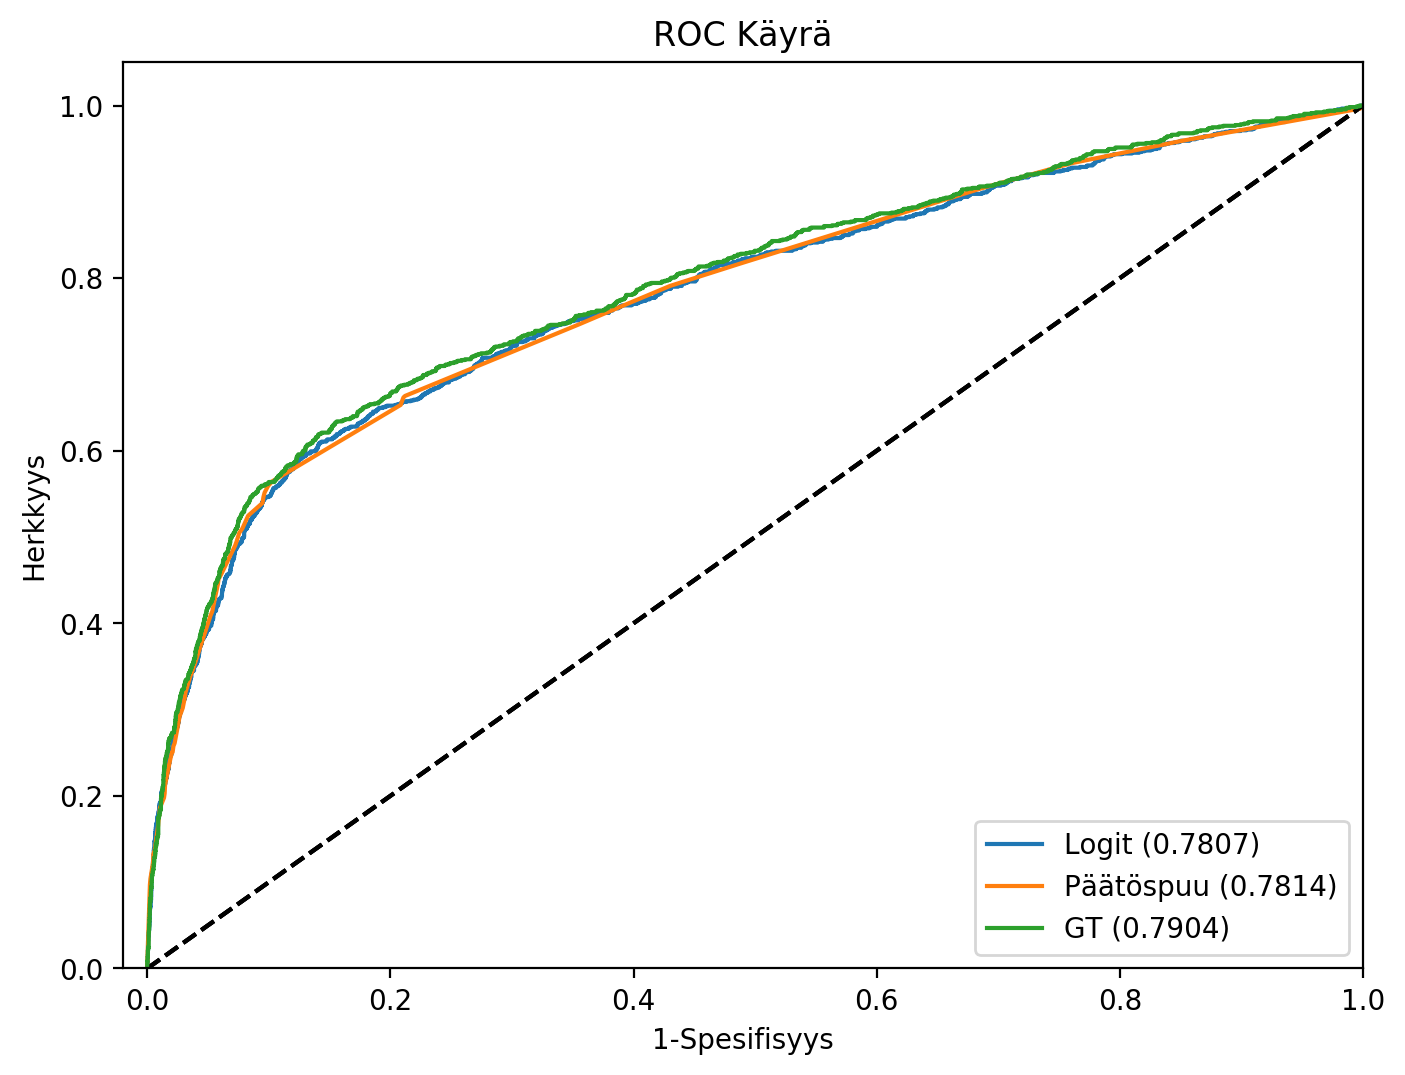

In [99]:

classifiers = {'Logit':log_reg, 'Päätöspuu': dt_best, 'GT':gbrt_best}

from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6), dpi=200)
for name, model in classifiers.items():
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]
    

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=name+' (%0.4f)'  % roc_auc)
    plt.xlabel('1-Spesifisyys')
    plt.ylabel('Herkkyys')
    plt.title('ROC Käyrä')
    
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.savefig('ROC_kkäyrä.png', dpi=200, bbox_inches='tight')
plt.show()   

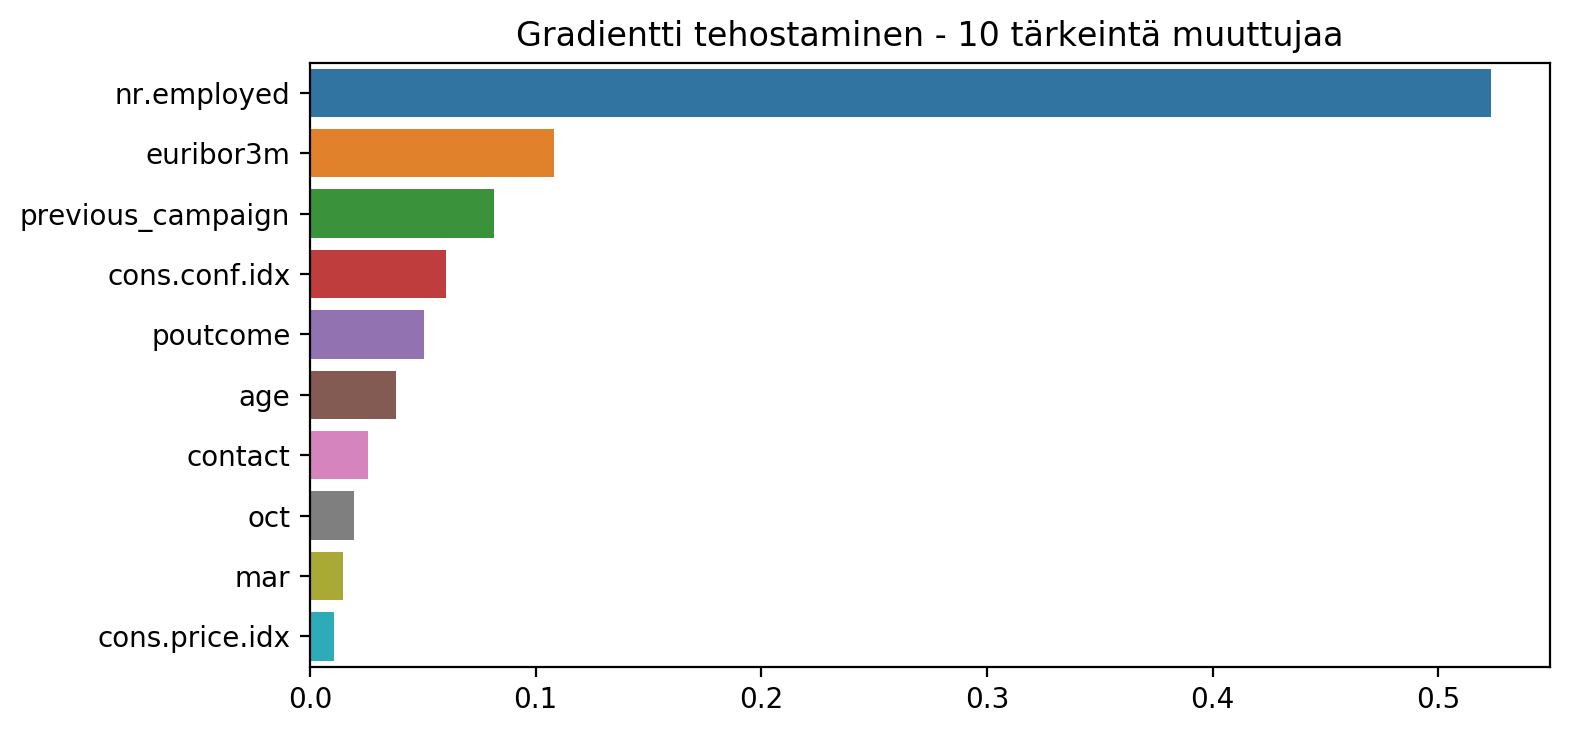

In [100]:
feature_importances = gbrt_best.feature_importances_

attributes = X_train.columns.astype(str)

feat_imp = sorted(zip(feature_importances, attributes), reverse=True)

x_value = [x[1] for x in feat_imp[:10]]
y_value = [x[0] for x in feat_imp[:10]]

plt.figure(figsize=(8,4), dpi=200)
sns.barplot(y_value,x_value)
plt.title("Gradientti tehostaminen - 10 tärkeintä muuttujaa")
plt.savefig('fimp.png', dpi=200, bbox_inches='tight')
plt.show()

In [101]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

def part_plot(a,b):
    fig, axs = plot_partial_dependence(gbrt_best, X_train,feature_names=list(X_train.columns), 
                                       features=[list(X_train.columns).index(a),list(X_train.columns).index(b)], grid_resolution=10)

    fig.set_dpi(200)
    plt.subplots_adjust(top=0.9)
    fig.set_size_inches(7, 4)

/home/pekka/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/home/pekka/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/home/pekka/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn

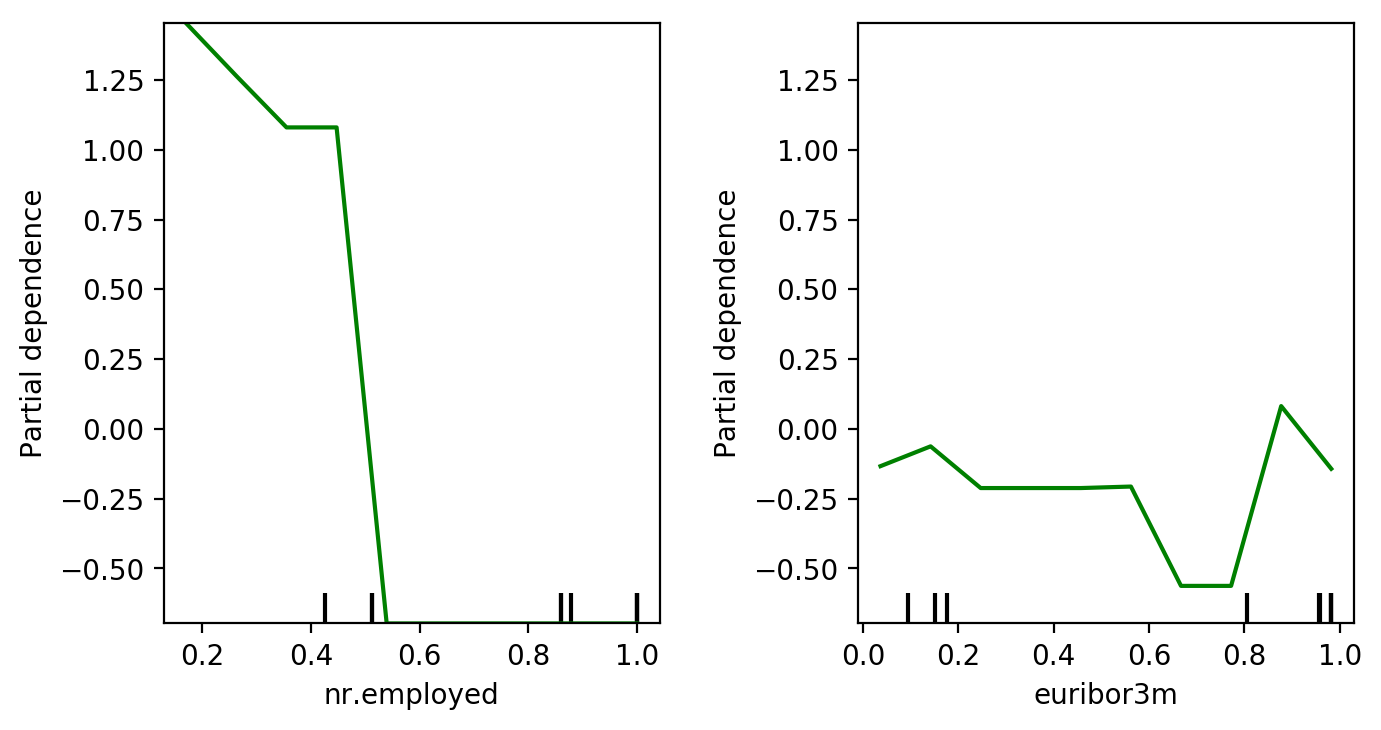

In [102]:
part_plot('nr.employed','euribor3m')
#plt.savefig('pdp1.png', dpi=200, bbox_inches='tight')

/home/pekka/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/home/pekka/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)


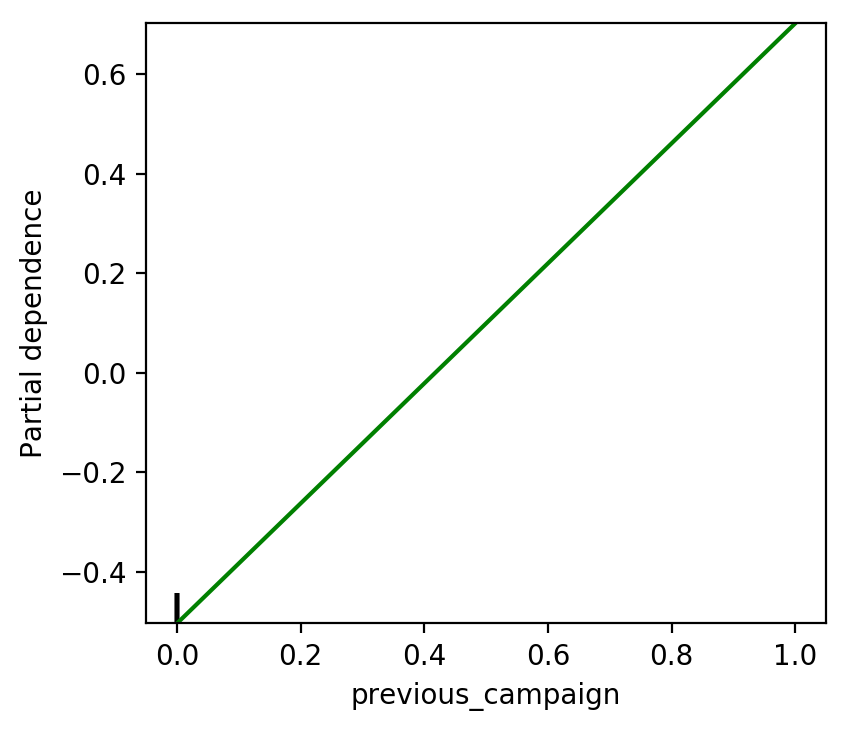

In [103]:
fig, axs = plot_partial_dependence(gbrt_best, X_train,feature_names=list(X_train.columns), 
                                       features=[list(X_train.columns).index('previous_campaign')], grid_resolution=10)
fig.set_dpi(200)
plt.subplots_adjust(top=0.9)
fig.set_size_inches(4, 4)
#plt.savefig('pdp2.png', dpi=200, bbox_inches='tight')

/home/pekka/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


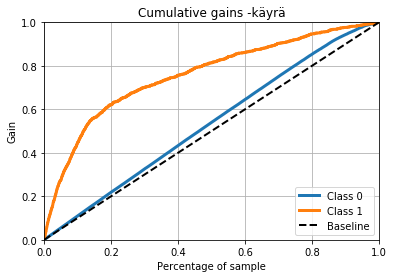

In [104]:
import scikitplot as skplt

y_probas = gbrt_best.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas, title="Cumulative gains -käyrä")
#plt.savefig('cumulative_gains.png', dpi=200, bbox_inches='tight')
plt.show()

So in the end the gradient boosting method was the most accurate. But the margin to the logistic regression was rather small. 